In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (12,6)

In [2]:
df = pd.read_csv('driver-data.csv')
df

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25
...,...,...,...
3995,3423310685,160.04,10
3996,3423312600,176.17,5
3997,3423312921,170.91,12
3998,3423313630,176.14,5


In [3]:
df.info()
# to check the column values and rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4000 non-null   int64  
 1   mean_dist_day         4000 non-null   float64
 2   mean_over_speed_perc  4000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 93.9 KB


In [4]:
df.describe()

,id,mean_dist_day,mean_over_speed_perc
count,4.000000e+03,4000.000000,4000.000000
mean,3.423312e+09,76.041523,10.721000
std,1.154845e+03,53.469563,13.708543
min,3.423310e+09,15.520000,0.000000
25%,3.423311e+09,45.247500,4.000000
50%,3.423312e+09,53.330000,6.000000
75%,3.423313e+09,65.632500,9.000000
max,3.423314e+09,244.790000,100.000000


In [5]:
# Create a function and make instance of minimum number of clusters that exist in a dataset
from sklearn.cluster import KMeans

In [7]:
# making instance of 2 cluster modules as it becomes easier to call later
kmeans = KMeans(n_clusters=2)
# we are dopping column of "id" as it doesn't have any refrence forming clustering.
df_analyze = df.drop('id', axis=1)

In [8]:
# Fit the model to the data 
kmeans.fit(df_analyze)

KMeans(n_clusters=2)

In [10]:
# to determine the cluster center vectors
kmeans.cluster_centers_

array([[ 50.04763438,   8.82875   ],
       [180.017075  ,  18.29      ]])

In [12]:
# display the labels
print(kmeans.labels_)
# display the length of labels
print(len(kmeans.labels_))

[0 0 0 ... 1 1 1]
4000


In [13]:
# to check how many unique drivers are present in available clusters
print(type(kmeans.labels_)) 
unique,counts = np.unique(kmeans.labels_,return_counts = True)
print(dict(zip(unique,counts)))

<class 'numpy.ndarray'>
{0: 3200, 1: 800}


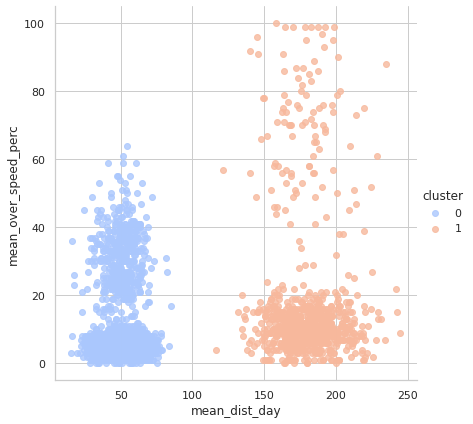

In [14]:
df_analyze['cluster'] = kmeans.labels_
sns.set_style('whitegrid')
sns.lmplot('mean_dist_day','mean_over_speed_perc',data = df_analyze, hue = 'cluster' , palette = 'coolwarm', size = 6, aspect = 1,fit_reg=False)

In [17]:
kmeans_4 = KMeans(n_clusters=4)
kmeans_4.fit(df.drop('id', axis=1))
kmeans_4.fit(df.drop('id', axis=1))
print(kmeans_4.cluster_centers_)
unique,counts = np.unique(kmeans_4.labels_,return_counts = True)
kmeans_4.cluster_centers_
print(dict(zip(unique,counts)))

[[ 49.9799964    5.22434282]
 [180.34311782  10.52011494]
 [177.83509615  70.28846154]
 [ 50.49167849  32.49172577]]
{0: 2775, 1: 696, 2: 104, 3: 425}


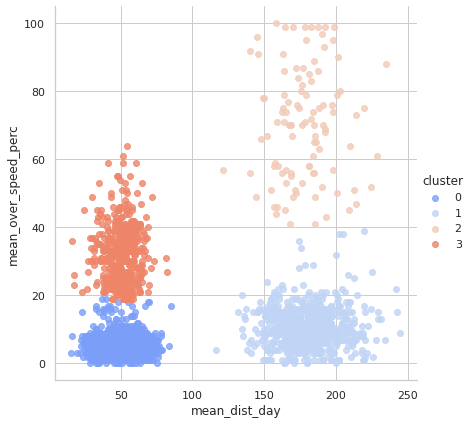

In [18]:
df_analyze['cluster'] = kmeans_4.labels_
sns.set_style('whitegrid')
sns.lmplot('mean_dist_day','mean_over_speed_perc',data = df_analyze, hue = 'cluster' , palette = 'coolwarm', size = 6, aspect = 1,fit_reg=False)